In [157]:
import pandas as pd
df=pd.read_csv("abalone.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [158]:
df=df.rename(columns={0:"sex",1:"length",2:"diameter",3:"height",4:"whole_weight",5:"shucked_weight",6:"viscera_weight",7:"shell_weight",8:"rings"})
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [159]:
df.shape

(4177, 9)

In [160]:
from sklearn.preprocessing import LabelEncoder
sex=df[["sex"]]
le=LabelEncoder()
sex=pd.DataFrame(le.fit_transform(sex),columns=sex.columns)
sex.head()

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,sex
0,2
1,2
2,0
3,2
4,1


In [161]:
y=df[["rings"]]
y.head()

,rings
0,15
1,7
2,9
3,10
4,7


In [162]:
sub_X=df.drop(["sex","rings"],axis=1)
X=pd.concat([sex,sub_X],axis=1)
X.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [163]:
df=pd.concat([X,y],axis=1)

In [166]:
#from sklearn.covariance import EllipticEnvelope
#clf = EllipticEnvelope(random_state=0).fit(df)
from sklearn.ensemble import IsolationForest
clf=IsolationForest(random_state=0).fit(df)
outlier_label=pd.DataFrame(clf.predict(df))
outlier_label=outlier_label.rename(columns={0:"outlier_label"})
outlier_label

,outlier_label
0,1
1,1
2,1
3,1
4,1
...,...
4172,1
4173,1
4174,1
4175,1


In [167]:
df_labeled=pd.concat([df,outlier_label],axis=1)

In [168]:
df_cleaned=df_labeled[df_labeled["outlier_label"]==1]
df_cleaned=df_cleaned.drop(["outlier_label"],axis=1)

In [169]:
df_cleaned.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [170]:
X=df_cleaned.drop(["rings"],axis=1)
X.shape

(3460, 8)

In [171]:
y=df_cleaned[["rings"]]

In [172]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=f_regression, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
7,1545.997312
3,1344.084998
2,1081.775034
4,953.085877
1,948.703029
6,806.442101
5,453.535582
0,1.305633


In [173]:
X_scores=scores[scores["scores"]>0]
len(X_scores)

8

In [174]:
X_prime=X.iloc[:,X_scores.index]
X_prime.head()

,shell_weight,height,diameter,whole_weight,length,viscera_weight,shucked_weight,sex
0,0.150,0.095,0.365,0.5140,0.455,0.1010,0.2245,2
1,0.070,0.090,0.265,0.2255,0.350,0.0485,0.0995,2
2,0.210,0.135,0.420,0.6770,0.530,0.1415,0.2565,0
3,0.155,0.125,0.365,0.5160,0.440,0.1140,0.2155,2
4,0.055,0.080,0.255,0.2050,0.330,0.0395,0.0895,1


In [175]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_prime=pd.DataFrame(scaler.fit_transform(X_prime),columns=X_prime.columns)
X_prime.head()

,shell_weight,height,diameter,whole_weight,length,viscera_weight,shucked_weight,sex
0,-0.730171,-1.446018,-0.588907,-0.729467,-0.782344,-0.830942,-0.689024,1.158325
1,-1.494355,-1.610517,-1.898260,-1.505363,-1.926961,-1.447006,-1.422045,1.158325
2,-0.157033,-0.130030,0.131238,-0.291093,0.035240,-0.355692,-0.501371,-1.297438
3,-0.682409,-0.459027,-0.588907,-0.724088,-0.945861,-0.678393,-0.741802,1.158325
4,-1.637639,-1.939514,-2.029196,-1.560496,-2.144984,-1.552617,-1.480686,-0.069556


In [176]:
scaler_y=StandardScaler()
y=pd.DataFrame(scaler_y.fit_transform(y),columns=y.columns)
y.head()

,rings
0,1.978885
1,-1.050065
2,-0.292828
3,0.085791
4,-1.050065


In [177]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)

(2595, 8)
(865, 8)


In [274]:
from sklearn import svm
SVM=svm.SVR(C=50,degree=5).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
SVM

SVR(C=50, degree=5)

In [275]:
from sklearn.metrics import mean_squared_error as mse
train_pred=SVM.predict(X_train)
test_pred=SVM.predict(X_test)

In [276]:
train_true=scaler_y.inverse_transform(y_train)
test_true=scaler_y.inverse_transform(y_test)
train_pred=scaler_y.inverse_transform(train_pred)
test_pred=scaler_y.inverse_transform(test_pred)
print("Root mean squared error for train data: ",np.sqrt(mse(train_true,train_pred)))
print("Root mean squared error for test data: ",np.sqrt(mse(test_true,test_pred)))

Root mean squared error for train data:  1.8738230718100153
Root mean squared error for test data:  1.9167843031246379


In [277]:
from sklearn.metrics import mean_absolute_error as mae
print("Mean absolute error for train data: ",mae(train_true,train_pred))
print("Mean absolute error for test data: ",mae(test_true,test_pred))

Mean absolute error for train data:  1.3009755251499202
Mean absolute error for test data:  1.3661426542738198


In [278]:
from sklearn.metrics import r2_score
print("R-squared for train data: ",r2_score(train_true,train_pred))
print("R-squared for test data: ",r2_score(test_true,test_pred))

R-squared for train data:  0.4869337067326641
R-squared for test data:  0.5014010903484354


In [279]:
train_mape=np.mean(np.abs((train_true-train_pred)/train_true))*100
test_mape=np.mean(np.abs((test_true-test_pred)/test_true))*100
print("MAPE for train data: ",train_mape,"%.")
print("MAPE for test data: ",test_mape,"%.")

MAPE for train data:  25.508622328395088 %.
MAPE for test data:  26.46028262105455 %.


In [280]:
from sklearn.ensemble import GradientBoostingRegressor
Gradient=GradientBoostingRegressor(learning_rate=0.07,n_estimators=250,subsample=0.8,max_depth=2,max_features="auto",
                                   random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
Gradient

GradientBoostingRegressor(learning_rate=0.07, max_depth=2, max_features='auto',
                          n_estimators=250, random_state=0, subsample=0.8)

In [281]:
from sklearn.metrics import mean_squared_error as mse
train_pred=Gradient.predict(X_train)
test_pred=Gradient.predict(X_test)

In [282]:
train_pred=scaler_y.inverse_transform(train_pred)
test_pred=scaler_y.inverse_transform(test_pred)
print("Root mean squared error for train data: ",np.sqrt(mse(train_true,train_pred)))
print("Root mean squared error for test data: ",np.sqrt(mse(test_true,test_pred)))

Root mean squared error for train data:  1.7416782280154282
Root mean squared error for test data:  1.8922443058672485


In [283]:
from sklearn.metrics import mean_absolute_error as mae
print("Mean absolute error for train data: ",mae(train_true,train_pred))
print("Mean absolute error for test data: ",mae(test_true,test_pred))

Mean absolute error for train data:  1.2655151631684027
Mean absolute error for test data:  1.383607581587914


In [284]:
from sklearn.metrics import r2_score
print("R-squared for train data: ",r2_score(train_true,train_pred))
print("R-squared for test data: ",r2_score(test_true,test_pred))

R-squared for train data:  0.5567465078803914
R-squared for test data:  0.5140861811545226


In [285]:
train_mape=np.mean(np.abs((train_true-train_pred)/train_true))*100
test_mape=np.mean(np.abs((test_true-test_pred)/test_true))*100
print("MAPE for train data: ",train_mape,"%.")
print("MAPE for test data: ",test_mape,"%.")

MAPE for train data:  26.465854642005 %.
MAPE for test data:  27.60680676925516 %.


In [262]:
from sklearn.ensemble import RandomForestRegressor
Forest=RandomForestRegressor(n_estimators=200,criterion="mae",max_features="log2",
                             random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
Forest

RandomForestRegressor(criterion='mae', max_features='log2', n_estimators=200,
                      random_state=0)

In [263]:
from sklearn.metrics import mean_squared_error as mse
train_pred=Forest.predict(X_train)
test_pred=Forest.predict(X_test)

In [264]:
train_pred=scaler_y.inverse_transform(train_pred)
test_pred=scaler_y.inverse_transform(test_pred)
print("Root mean squared error for train data: ",np.sqrt(mse(train_true,train_pred)))
print("Root mean squared error for test data: ",np.sqrt(mse(test_true,test_pred)))

Root mean squared error for train data:  0.7475258612882889
Root mean squared error for test data:  1.8606551226783359


In [265]:
from sklearn.metrics import mean_absolute_error as mae
print("Mean absolute error for train data: ",mae(train_true,train_pred))
print("Mean absolute error for test data: ",mae(test_true,test_pred))

Mean absolute error for train data:  0.5431811175337189
Mean absolute error for test data:  1.3673005780346823


In [266]:
from sklearn.metrics import r2_score
print("R-squared for train data: ",r2_score(train_true,train_pred))
print("R-squared for test data: ",r2_score(test_true,test_pred))

R-squared for train data:  0.9183476357991127
R-squared for test data:  0.5301744812505667


In [273]:
train_mape=np.mean(np.abs((train_true-train_pred)/train_true))*100
test_mape=np.mean(np.abs((test_true-test_pred)/test_true))*100
print("MAPE for train data: ",train_mape,"%.")
print("MAPE for test data: ",test_mape,"%.")

MAPE for train data:  27.90439759442313 %.
MAPE for test data:  27.652487082213806 %.


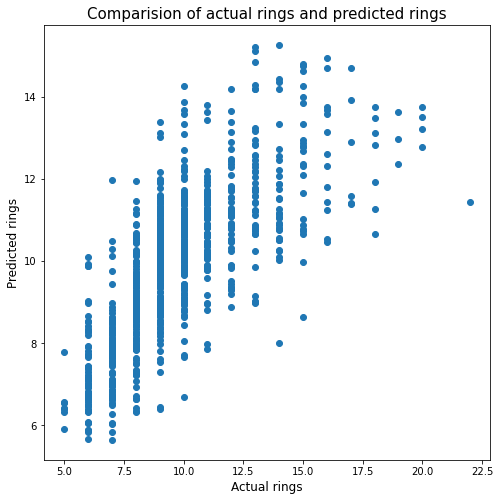

In [268]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(test_true,test_pred)
plt.title("Comparision of actual rings and predicted rings",fontsize=15)
plt.xlabel("Actual rings",fontsize=12)
plt.ylabel("Predicted rings",fontsize=12)
plt.show()

### Conclusion:

1. Use IsolationForest to filter out the outliers. For this dataset, IsolationForest produced better results than EllipticEnvelope.
2. Standardize the data.

|Model|Test data RMSE|Test data MAE|Test data MAPE|Test data R-squared|
|-----|----|---|---------|----|
|Support Vector Machine|1.92|1.37|26.46%|0.50|
|GradientBoostingRegressor|1.89|1.38|27.61%|0.51|
|RandomForestRegressor|1.86|1.37|27.65%|0.53|

The RandomForestRegressor model has the lowest test data RMSE. However, it has the highest test data MAPE. The Support Vector Machine model has the highest test data RMSE. However, it has the lowest test data MAPE. The GradientBoostingRegressor model is in between.

MAPE for test data is 27.65%. The average difference between the predicted value and the actual value is 27.65% of the actual value. **All three models are indeed fair models.** R-squared is a bit low for test data (0.53). However, R-squared explains the percentage of variation in the target variable that can be explained by the variations in the predictor variables, rather than how accurate the predictions are. **RMSE, MAE and MAPE indicate that although the models are not perfect, but they are fair.**